# Using k means clustering to find segmentation in customers

In [145]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [146]:
data= pd.read_csv('Mall_Customers.csv')
df= pd.DataFrame(data)

df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [147]:
df.drop(columns=['CustomerID'],inplace=True)
df.rename(columns={'Annual Income (k$)':'Income($)', 'Spending Score (1-100)': 'SpendingScore'},inplace=True)
df.head(10)

,Genre,Age,Income($),SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Genre          200 non-null    object
 1   Age            200 non-null    int64 
 2   Income($)      200 non-null    int64 
 3   SpendingScore  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


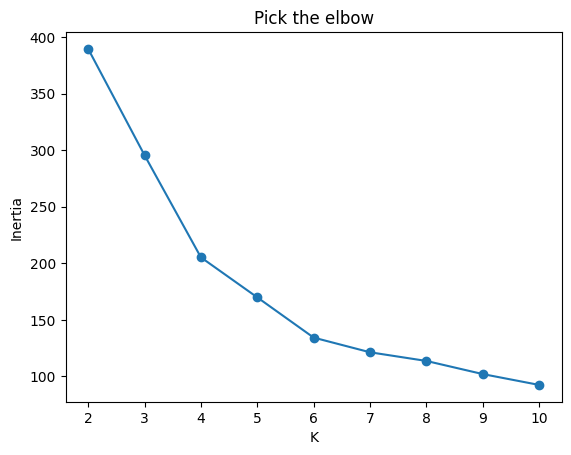

Use K = 6


In [149]:
x= df[['Age','Income($)','SpendingScore']]

scaler= StandardScaler()

x_scaled= scaler.fit_transform(x)

inertia=[]
silhouette=[]

for k in range(2,11):
    kmeans= KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(x_scaled, kmeans.labels_))

plt.plot(range(2, 11), inertia, 'o-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Pick the elbow')
plt.show()

best_k = range(2, 11)[silhouette.index(max(silhouette))]
print(f"Use K = {best_k}")




In [150]:
model= KMeans(n_clusters=best_k, init='k-means++')
model.fit(x_scaled)

df['clusters']= model.labels_

cluster_summary= df.groupby('clusters')[['Income($)','SpendingScore']].mean()


score = silhouette_score(x_scaled, model.labels_)
print(score)

print("clusters assignment:")
print(df)

print("Summary of clusters")
print(cluster_summary)


0.429210925806494
clusters assignment:
      Genre  Age  Income($)  SpendingScore  clusters
0      Male   19         15             39         2
1      Male   21         15             81         2
2    Female   20         16              6         5
3    Female   23         16             77         2
4    Female   31         17             40         5
..      ...  ...        ...            ...       ...
195  Female   35        120             79         0
196  Female   45        126             28         1
197    Male   32        126             74         0
198    Male   32        137             18         1
199    Male   30        137             83         0

[200 rows x 5 columns]
Summary of clusters
          Income($)  SpendingScore
clusters                          
0         86.538462      82.128205
1         89.437500      17.343750
2         25.833333      76.916667
3         54.266667      49.066667
4         57.974359      46.692308
5         26.285714      19.380952


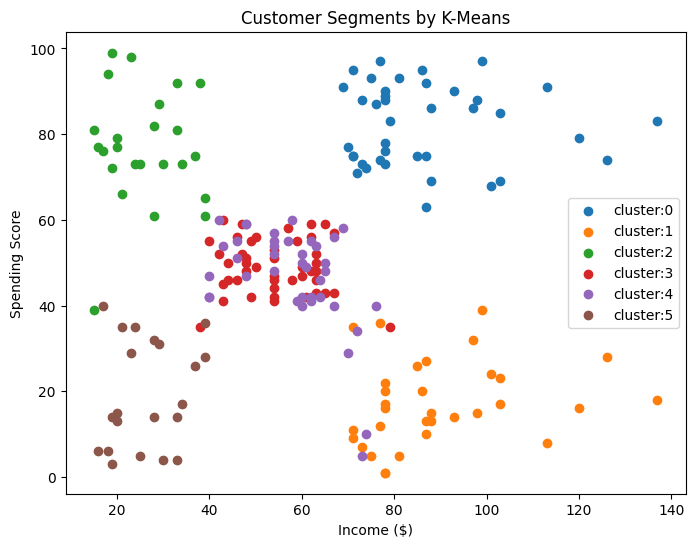

In [151]:

plt.figure(figsize=(8,6))

for cluster in sorted(df['clusters'].unique()):
    cluster_data= df[df['clusters']== cluster]
    plt.scatter(
        cluster_data['Income($)'],
        cluster_data['SpendingScore'],
        label=f'cluster:{cluster}'
    )


plt.xlabel('Income ($)')
plt.ylabel('Spending Score')
plt.title('Customer Segments by K-Means')
plt.legend()
plt.show()